<center><a href="https://colab.research.google.com/github/jjrodcast/MaskDectector/blob/master/MaskDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a></center>

<center><h1>Face Mask Detector<h1><center>



## 1. Cargamos librerías

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from utils.predict import Predictor
from utils.model_utils import draw_bbox

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## 2. Copiamos nuestro modelo de Tensorflow 2.x

En este caso se está usando el archivo `yolov4-192` que se generó luego de convertir nuestros pesos de YOLOv4 hacia Tensorflow 2.x _(ver notebook: `PY1_Conversión_YOLOv4_to_Tensorflow`)_.

Copiamos dicho archivo a este notebook, en este caso estoy usando la ruta de mi Google Drive, deben cambiar la ruta `'/content/gdrive/My Drive/DATASETS/YOLOv4-TF/yolov4-192'` con la ruta de su Drive correspondiente.

In [12]:
!cp -R '/content/gdrive/My Drive/DATASETS/YOLOv4-TF/yolov4-192' '/content'

## 3. Predicción sobre nuevas imágenes

Establecemos algunos parámetros

In [13]:
CONFIDENCE = 0.30 # Porcentage de confianza del detector de rostros
classes = ['mask_weared_incorrect', 'with_mask', 'without_mask'] # Clases de la capa final

Cargamos el objeto Predictor para generar la predicción sobre nuevas imágenes

In [14]:
# Load Predictor
predictor = Predictor(model_path='/content/yolov4-192', classes=classes, confidence=CONFIDENCE)

Ejecutamos el método `predict` donde le pasamos la ruta de la imagen y las dimensones de la misma, en nuestro caso al haber usado `192x192` pues usamos dicho valor. Si han entrenado sobre otro dataset con un valor distinto, usar el mismo en este parámetro.

In [19]:
pred = predictor.predict(img_path='/content/multimedia/test4.jpg', img_size=(192,192))

Visualizamos la imagen que se ha predecido

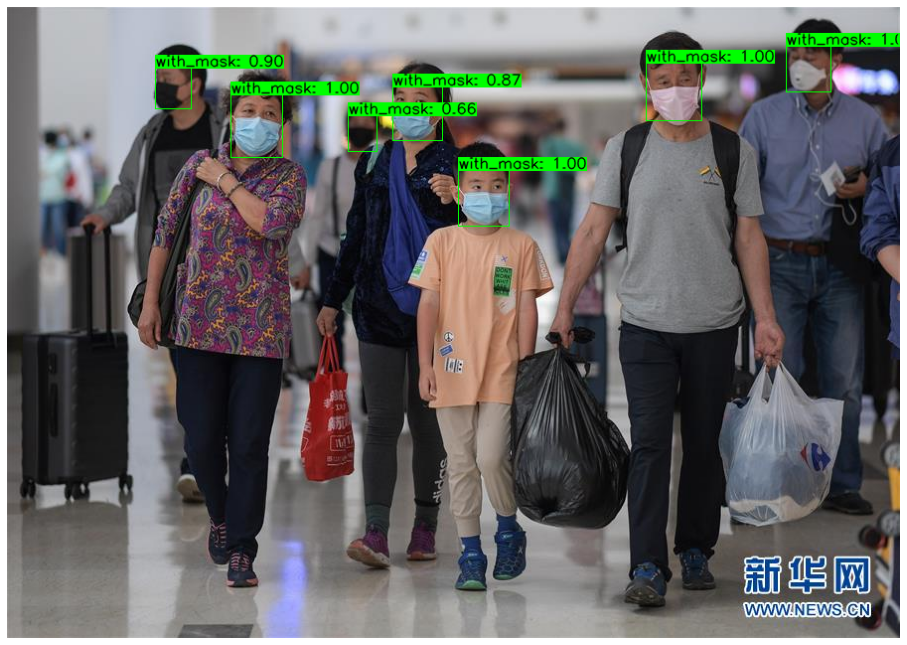

In [20]:
plt.figure(figsize=(16,16))
plt.imshow(cv2.cvtColor(pred, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()